In [1]:
#먼저 필요한 패키지를 가져옵니다

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
abalone_columns = list()   #list타입의 저장공간이 생김
for l in open('data/abalone_attributes.txt'):
    abalone_columns.append(l.strip())
    
abalone_columns

data = pd.read_csv('data/abalone.txt', header=None, names=abalone_columns)   #header는 없으니까 None

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
label = data['Sex']
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.shape

(4177, 9)

In [7]:
del data['Sex'] #Sex 칼럼 삭제

In [8]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [11]:
data = (data - np.min(data)) / (np.max(data) - np.min(data))  #minmax 계산구조 활용

In [12]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mMscaler = MinMaxScaler()

In [15]:
#mMscaler.fit(data)   #data를 적용시키는 작업

In [16]:
mMscaled_data = mMscaler.fit_transform(data)  #실제로 데이터 붙이고 변환도 일어남

In [17]:
type(mMscaled_data)

numpy.ndarray

In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [20]:
sdscaled_data = sdscaler.fit_transform(data)

In [21]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [22]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [23]:
sdscaled_data = sdscaler.fit_transform(data)

In [24]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

In [26]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [27]:
data.shape

(4177, 8)

In [28]:
ros.fit_resample(data, label)

(        Length  Diameter    Height  Whole weight  Shucked weight  \
 0     0.513514  0.521008  0.084071      0.181335        0.150303   
 1     0.371622  0.352941  0.079646      0.079157        0.066241   
 2     0.614865  0.613445  0.119469      0.239065        0.171822   
 3     0.493243  0.521008  0.110619      0.182044        0.144250   
 4     0.344595  0.336134  0.070796      0.071897        0.059516   
 ...        ...       ...       ...           ...             ...   
 4579  0.621622  0.579832  0.119469      0.212679        0.194015   
 4580  0.797297  0.747899  0.150442      0.458828        0.405178   
 4581  0.655405  0.621849  0.119469      0.289888        0.249159   
 4582  0.722973  0.705882  0.150442      0.367098        0.297579   
 4583  0.297297  0.268908  0.061947      0.042146        0.030935   
 
       Viscera weight  Shell weight     Rings  
 0           0.132324      0.147982  0.500000  
 1           0.063199      0.068261  0.214286  
 2           0.185648     

In [29]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)  #데이터를 불리기
oversampled_data = pd.DataFrame(oversampled_data, columns = data.columns)

In [30]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.479730,0.436975,0.084071,0.133168,0.117014,0.104674,0.102641,0.250000
4580,0.385135,0.361345,0.084071,0.070126,0.048420,0.073074,0.059292,0.250000
4581,0.560811,0.537815,0.101770,0.162741,0.136516,0.123766,0.141006,0.250000
4582,0.182432,0.159664,0.048673,0.015761,0.010760,0.015142,0.013453,0.142857


In [31]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)

In [32]:
undersampled_data.shape

(3921, 8)

In [33]:
from sklearn.datasets import make_classification
data, label = make_classification(
    n_samples=1000,   #샘플의 개수
    n_classes=3,   #내가 분류하고자하는 카테고리의 개수 = 3
    n_features=2,   #feature를 두개로!
    n_repeated=0,  #반복은 하지 않게 0으로 지정
    n_informative=2,  # 겹치는 클래스가 얼마나 있는가(디폴트 2)
    n_redundant=0,   # 클래스 안의 데이터들이 독자적으로 갈 수 있는 개수(그냥 0 디폴트로 알기)
    n_clusters_per_class=1,   #한 그룹에 1개 클래스만 들어가도록 함
    weights=[0.05, 0.15, 0.8],  #카테고리 3개의 가중치
    class_sep=0.8,   #샘플 데이터가 얼마나 떨어져있는가 설정(숫자가 커지면 클래스 사이의 간격이 벌어짐)
    random_state=2022)

In [34]:
data

array([[-1.91117507,  0.90864868],
       [ 0.23908554, -1.9966176 ],
       [ 0.41063734, -1.09651695],
       ...,
       [-0.74729639, -1.06505046],
       [ 0.78391513, -1.6661851 ],
       [-0.04871935,  2.48764856]])

In [35]:
data.shape

(1000, 2)

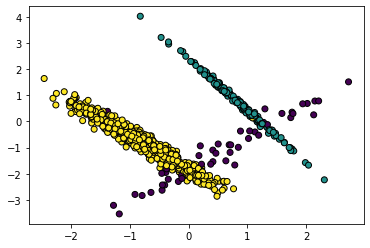

In [36]:
plt.scatter(data[:,0], data[:,1], c=label, linewidth=1, edgecolor='black')   # x축과 y축 설정, color는 label로 지정(클래스별로 색상 지정)하겠다

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5) #주변에 5개를 기준

In [38]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [39]:
data.shape

(1000, 2)

In [40]:
smoted_data.shape

(2382, 2)

In [41]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))  #label기준으로 안의 데이터를 dummies하고 라벨 기준으로 합계값을 {}에 넣음
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


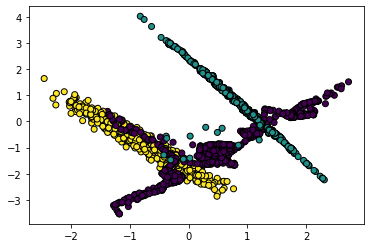

In [42]:
plt.scatter(smoted_data[:,0],smoted_data[:,1],
           c=smoted_label, linewidth=1, edgecolor='black')

In [43]:
from sklearn.datasets import load_digits

In [44]:
digits = load_digits()

In [45]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [46]:
digits.data.shape

(1797, 64)

In [47]:
data = digits.data
label = digits.target

Label : 0


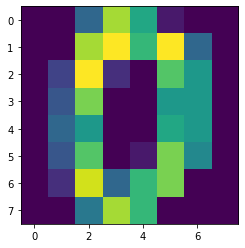

In [48]:
plt.imshow(data[0].reshape(8,8)) #(1797, 64)를 (1797, 8, 8)로 만듬 / 밑의 데이터는 숫자 0을 나타내는 데이터
print('Label : {}'.format(label[0]))

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #data의 주성분을 몇차원으로 줄일 것이냐 → 2차원

In [50]:
new_data = pca.fit_transform(data)   #차원 낮추는 기능
#차원축소는 어케? : pca 알고리즘을 이용해서 차원을 축소하여 특징을 살림

In [51]:
data.shape

(1797, 64)

In [52]:
new_data.shape

(1797, 2)

In [53]:
new_data[0]

array([-1.2594674 , 21.27488571])

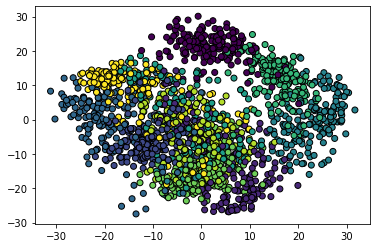

In [54]:
plt.scatter(new_data[:,0], new_data[:,1], c=label,
           linewidth=1, edgecolor='black')

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [55]:
data = pd.read_csv('data/abalone.txt', header=None,
                  names = abalone_columns)

In [56]:
label = data['Sex']

In [57]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
label_encoded_label = le.fit_transform(label)

In [60]:
label_encoded_label  #label인 성별 M, F, I가 0, 1, 2로 변경됨

array([2, 2, 0, ..., 2, 0, 2])

In [61]:
result = pd.DataFrame(data = 
                      np.concatenate([label.values.reshape((-1,1)), 
                      label_encoded_label.reshape((-1, 1))], axis=1),
                        columns=['label', 'label_encoded'])
#concatenate : 텍스트 합치기
#label_encoded_label.reshape((-1,1)) : 데이터 4177개를 array안에 각각 값이 한개씩 반영됨

In [62]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)   #sparse : 디폴트는 True(Matrix로 출력) / False(배열로 출력 → 주로 사용) 

In [64]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1, 1))

In [65]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


K-Means Clustering

In [66]:
from sklearn.datasets import load_wine
wine = load_wine()

In [67]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [68]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [69]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [70]:
data.shape

(178, 13)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [72]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [74]:
data.shape

(178, 2)

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [76]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [77]:
cluster = kmeans.predict(data)

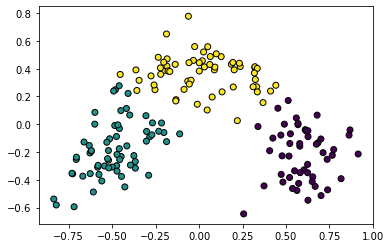

In [78]:
plt.scatter(data[:,0], data[:,1], c= cluster,
           linewidth=1, edgecolor='black')

https://github.com/KoreaEVa/AI 참고(김영욱강사님 github)
https://www.youtube.com/results?search_query=%EC%9D%B4%EC%88%98%EC%95%88%EC%BB%B4%ED%93%A8%ED%84%B0 참고(딥러닝 관련 강좌)

Hierarchical Clustering

https://book.interpark.com/product/BookDisplay.do?_method=detail&sc.prdNo=303260973&gclid=CjwKCAjwur-SBhB6EiwA5sKtjpl0AFSX2CvwZNv0X5k_9Mspz9sesD8OoSp4I1qfDdt1U7IxktTEsBoCVtUQAvD_BwE

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
!pip install mglearn

In [81]:
import mglearn

C:\Users\sec\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)


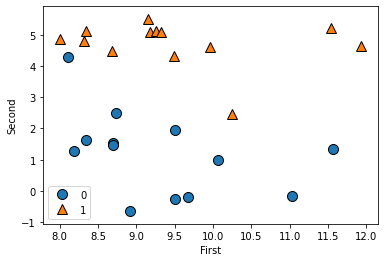

In [82]:
# 지도 학습 알고리즘

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)   #삼각형 점을 그릴 수 있는 method
plt.xlabel('First')
plt.ylabel('Second')
plt.legend()
print(X.shape)

(40, 1)


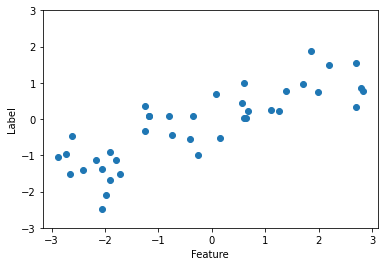

In [83]:
X, y = mglearn.datasets.make_wave(n_samples=40)   #n_samples=40 : 샘플의 개수 40개

plt.plot(X, y, 'o')
plt.ylim(-3,3)

plt.xlabel('Feature')
plt.ylabel('Label')
print(X.shape)

In [84]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [85]:
cancer.data.shape

(569, 30)

In [86]:
#cancer.target   #malignant : 양성 / #benign : 음성
#cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

C:\Users\sec\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


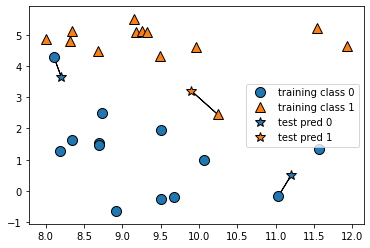

In [87]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\sec\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


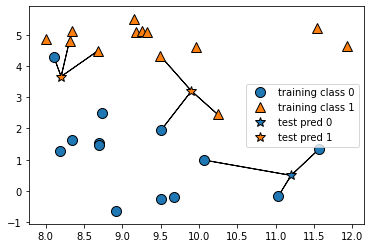

In [88]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [89]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\sec\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [91]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [93]:
clf.score(X_test, y_test)

0.8571428571428571

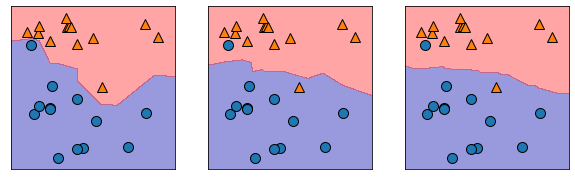

In [94]:
fig, axes = plt.subplots(1,3, figsize=(10,3))  # axes : 축 / axis : 중심축
for n_neighbors, ax in zip([1,3,9], axes):   #zip : 
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,
                                   alpha=0.4)   #2차원으로 쪼개진 것을 보여주는 것
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

In [95]:
from sklearn import neighbors
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11) # 1부터 11까지의 리스트 만들기

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  training_accuracy.append(clf.score(X_train, y_train))  #학습훈련 정확도
  test_accuracy.append(clf.score(X_test, y_test))  #테스트 정확도


In [96]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'Accuracy')

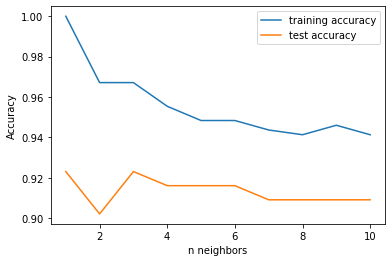

In [97]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')    #x축은 최근접의 갯수 / y는 정확도 → 최근접 갯수에 따라 학습, 테스트 정확도가 나오게
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')

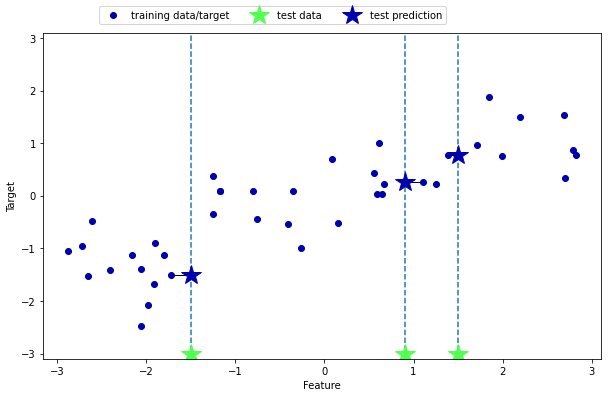

In [98]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

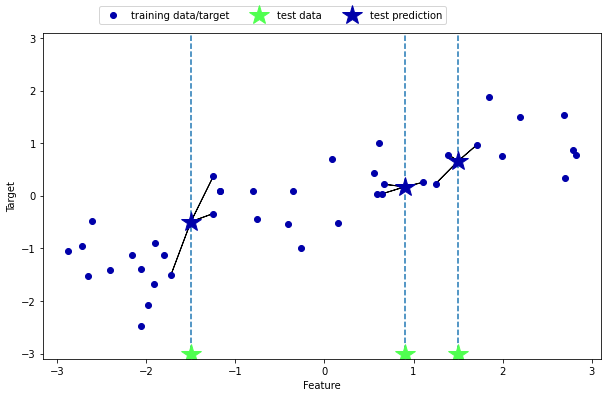

In [99]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [101]:
reg.predict(X_test)
reg.score(X_test, y_test)

0.8344172446249605

In [102]:
np.linspace(-3, 3, 1000).reshape(-1, 1)

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2

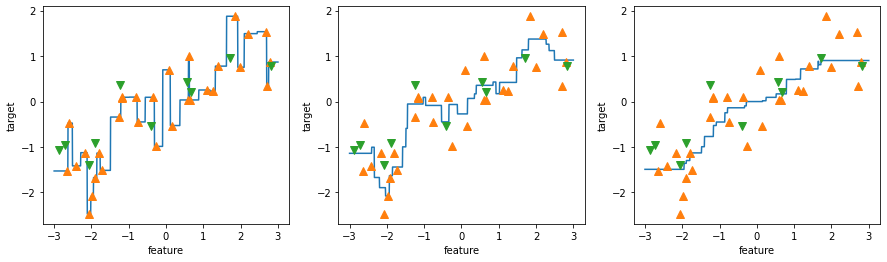

In [103]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes): #n_neighbors : 최근젒의 개수 / ax : 축의 개수
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    #최근접을 1개로 했을때, 데이터의 특성에 너무 맞음 → 임의의 데이터가 들어왔을때 오차가 커질 가능성이 생김
    #최근접은 3개로 했을때, 데이터 특성을 반영하고, 트렌드를 따라감
    #최근접을 9개로 했을때, 트렌드만 따라감

w[0]: 0.393906  b: -0.031804


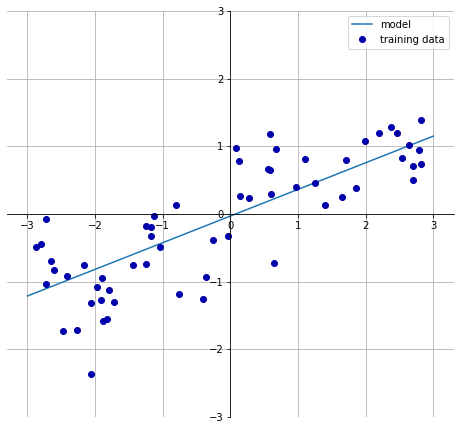

In [104]:
mglearn.plots.plot_linear_regression_wave()

In [105]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [106]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


In [107]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [108]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\sec\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [109]:
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.9520519609032728
0.607472195966587


In [110]:
# Rideg / 릿지
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744758


In [111]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)  #alpha : 제약두는 정도

print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369614
0.6359411489177311


In [112]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001983
0.7722067936480148


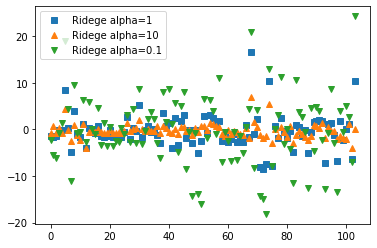

In [113]:
plt.plot(ridge.coef_, 's', label='Ridege alpha=1')   #s:square
plt.plot(ridge10.coef_, '^', label='Ridege alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridege alpha=0.1')

plt.legend()

In [114]:
# Lasso / 라쏘 회귀

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114596
0.20937503255272272


In [115]:
lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)

print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.8961122320864717
0.7677995670886714


C:\Users\sec\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [116]:
lasso00001 = Lasso(alpha = 0.0001).fit(X_train, y_train)

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))

0.9420931515237063
0.6976541391663641


C:\Users\sec\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [117]:
lasso0 = Lasso(alpha = 0).fit(X_train, y_train)

print(lasso0.score(X_train, y_train))
print(lasso0.score(X_test, y_test))

0.9426383219008584
0.6916323869060212


C:\Users\sec\AppData\Local\Temp/ipykernel_18652/1357031886.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso0 = Lasso(alpha = 0).fit(X_train, y_train)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sec\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_

C:\Users\sec\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


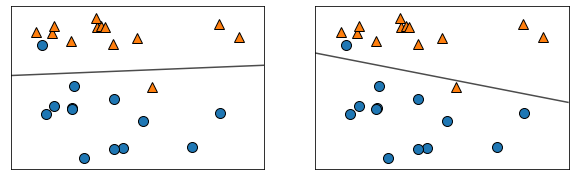

In [118]:
#분류에 대한 선형 모델
from sklearn.linear_model import LogisticRegression  #로지스틱회귀 : 회귀 알고리즘이 아니라, Classification알고리즘임!
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                    alpha = 0.7, ax=ax)
    
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

### https://youtu.be/Xm2C_gTAl8c (Lasso, Ridge)

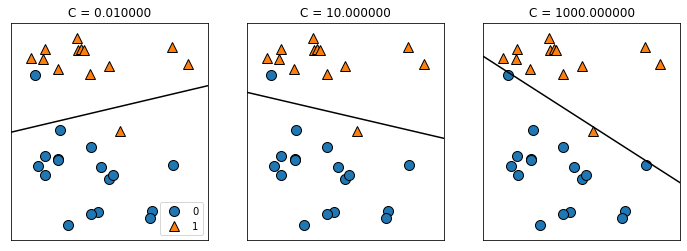

In [119]:
mglearn.plots.plot_linear_svc_regularization()   #정규화

In [122]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_test, y_test))
print(logreg.score(X_test, y_test))

0.958041958041958
0.958041958041958


C:\Users\sec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
# https://scikit-learn.org/stable/modules/preprocessing.html